## Stroop Test--Questions and Answers

*1- What is our independent variable? What is our dependent variable?*

The independent variable is the word/color combination (i.e. congruent words or incongruent words) that is prompted to the test participant. The dependent variable is the time it takes for the participant to complete each task.

*2- What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.*

The null hypothesis is that there is no significant difference between people's speed in reading congruent word-color combinations and reading incongruent word-color combinations. In other words, for this hypothesis to be true, we're stating that differences in the sample observations result purely from chance and are not statistically significant. This hypothesis can be expressed as follows:

\begin{align}
H_0: \mu_{c} - \mu_{i} = 0 \\
\end{align}

In this expression $\mu_{c}$ represents the congruent population mean, and $\mu_{i}$ represents the incongruent population mean. The null hypothesis is that there will be no significant difference between them, so $\mu_{c}$ - $\mu_{i}$ is approximately zero. Another way to express this is stating that the mean of the difference between the two populations will be equal to zero, as follows:

\begin{align}
H_0: \mu_{d} = 0 \\
\end{align}

The alternative hypothesis is that there is a significant difference between people's speed in reading congruent and incongruent word-color combinations. We can go further and hypothesize that people will read slower with incongruent word-color combinations than with congruent word-color combinations, as we would not reasonably expect the incongruent combinations to speed up the reading. This hypothesis can be expressed one of the following two ways:

\begin{align}
H_1: \mu_{c} - \mu_{i} < 0 \\
H_1: \mu_{d} < 0 \\
\end{align}

As for which statistical test to perform, in this case, since we do not know the overall population's mean and standard deviation, and all we have are two samples, we must use the t-test instead of the z-test. Also, we're looking at paired samples, where we want to pair the observations from one sample with the observations from the other. Therefore I expect to perform a single-tailed (specifically lower-tailed) t-test for dependent means (or paired t-test) to measure the hypotheses.

The assumptions for the t-test for dependent means are that the scale of measurement is approximately interval; we have random sampling from a defined population; the samples used to produce the different scores are linked in the population through repeated measurement, natural association or matching; and the scores are normally distributed in the population.

*Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.*

I finished the test the first time (congruent) in 8.448 seconds, and the second time (incongruent)in 21.507 seconds. For the rest of this step, I downloaded the CSV file, then used a custom Python function to read in the data, creating two arrays of data:  one for the congruent times, and another for the incongruent times.

*3- Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.*

```python
mean_congruent_times = 14.05 # mean of the congruent times
mean_incongruent_times = 22.02 # mean of the incongruent times
sd_congruent_times = 3.56 # standard deviation of the congruent times
sd_incongruent_times = 4.8 # standard deviation of the incongruent times
```
*4- Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.*

(See plots below under "Question 4--Plot Data"). I made a simple bar graph plotting the mean of the congruent times and the incongruent times. This one was a simple visualization showing the difference between the two tests, and made it very clear that the incongruent times were longer, on average. My second plot was a stacked bar histogram, which showed the frequency of each value, for each type of test. This one also made it clear that the times were by and large longer for the incongruent tests.

*5- Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?*

```python
degrees_of_freedom = 23 # degrees of freedom of the sample
t_statistic = -8.02 # t-statistic of both samples
alpha = 0.05 # alpha or p-value for test, based on confidence level of 95%
t_critical = +-1.71 # t-critical value for alpha = 0.05
```

The confidence level I chose for this test was 95%, meaning that my alpha or p value was 0.05. The t-critical value based on the t-table (I used Python's scipy.stats library to look this up) was plus or minus 1.71. The t-statistic, comparing the incongruent times with the congruent times, was -8.02. The t-statistic was clearly much lower than the critical t-value of -1.71, which means we reject the null hypothesis. In other words, we can confidently (greater than 95% confidence) say that the average time for the congruent test will be lower than that for the incongruent test. Also, since this is an experimental design, we can comment about the causality, stating that the incongruent test causes higher times than the congruent test. This was exactly the result that I expected going into the test.

*6- Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!*

I think our brains have a hard time reading words and saying something else out loud at the same time. I do think that the results might be different if the test subjects were given words in a non-native language, maybe a second language that they had learned, or else a made-up language that they were taught at the beginning of the test. I could see the same issue arising if you altered font sizes of words and told subjects to say 'big' or 'small' based on the size of the font while ignoring what the words actually say.

## Stroop Test--Evidence and Plots
Below is shown the work I did to make all the calculations as well as the plots for question 4.

#### Question 2--Read Data in from CSV

In [2]:
import csv
def get_list_from_csv(file_name, column=0, skip_first_row=True):
    data_list = []
    with open(file_name, 'r') as csvfile:
        reader = csv.reader(csvfile)
        counter = 0
        for row in reader:
            if counter == 0 and skip_first_row == True:
                counter += 1
                next
            elif row[column] != '' and row[column]:
                data_list.append(float(row[column]))
    return data_list

congruent_times = get_list_from_csv('stroopdata.csv', column=0, skip_first_row=True)
incongruent_times = get_list_from_csv('stroopdata.csv', column=1, skip_first_row=True)

#### Question 3--Report Descriptive Statistics from this Dataset
Below shows how I calculated the descriptive statistics for question 3.

In [3]:
# load required Python libraries
import numpy as np
import math
# method for finding standard deviation from an array or list of values; includes option for Bessel's correction
def find_standard_deviation(input_array, sample=False):
    # initialize array for housing new array of values that show deviation from mean
    deviation_array = []
    for i in input_array:
        # take the deviation from the mean for each value and square it, then add it to the new array
        deviation = (i - np.average(input_array)) ** 2
        deviation_array.append(deviation)
    if sample == True:
        # Bessel's correction for samples
        mean_deviation = sum(deviation_array) / (len(deviation_array) - 1)
    else:
        mean_deviation = np.average(deviation_array)
    # take the square root of the mean of the deviation values
    standard_deviation = math.sqrt(mean_deviation)
    return standard_deviation

# calculate mean for each sample, using Numpy function np.average
congruent_mean = np.average(congruent_times)
incongruent_mean = np.average(incongruent_times)

# calculate standard deviation for each sample, using the above method
congruent_sd = find_standard_deviation(congruent_times, sample=True)
incongruent_sd = find_standard_deviation(incongruent_times, sample=True)

print("Congruent mean: ", congruent_mean)
print("Congruent standard deviation: ", congruent_sd)
print("Incongruent mean: ", incongruent_mean)
print("Incongruent standard deviation: ", incongruent_sd)

Congruent mean:  14.051125
Congruent standard deviation:  3.559357957645195
Incongruent mean:  22.0159166667
Incongruent standard deviation:  4.797057122469138


#### Question 4--Plot Data

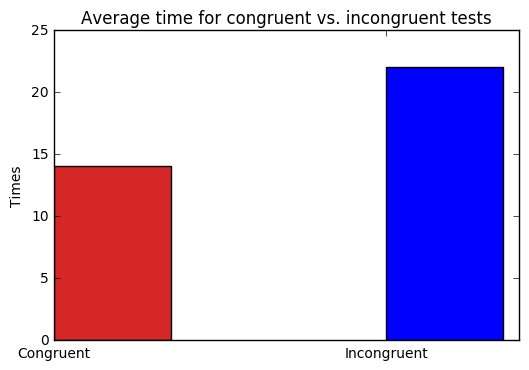

In [4]:
# load matplotlib library as plt, and display it inline in the Jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline
# take the mean values of each sample as the values to plot
values_for_plot = [congruent_mean, incongruent_mean]
ind = np.arange(len(values_for_plot))
# use the plt.bar method from pyplot to plot the two bars
p1 = plt.bar(ind, values_for_plot, 0.35, color=('#d62728', '#0000ff'))
plt.ylabel('Times')
plt.xticks(ind, ('Congruent', 'Incongruent'))
plt.title('Average time for congruent vs. incongruent tests')
plt.show()

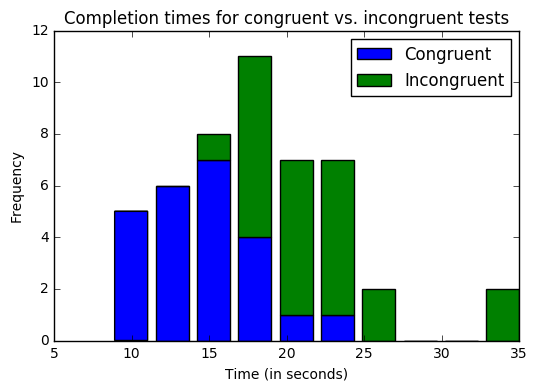

In [5]:
# make a histogram using the congruent times and incongruent times as input
p1 = plt.hist([congruent_times, incongruent_times], histtype='barstacked')
plt.ylabel('Frequency')
plt.xlabel('Time (in seconds)')
plt.title('Completion times for congruent vs. incongruent tests')
plt.legend(('Congruent', 'Incongruent'))
plt.show()

#### Question 5--Statistical Test

In [9]:
# load additional required Python libraries
import scipy
import scipy.stats

# calculate mean difference between two samples
def get_mean_difference(sample1, sample2):
    difference = np.array(sample2) - np.array(sample1)
    mean_difference = np.average(difference)
    return mean_difference

# method for finding standard deviation from an array or list of values; includes option for Bessel's correction
def find_standard_deviation(input_array, sample=False):
    # initialize array for housing new array of values that show deviation from mean
    deviation_array = []
    for i in input_array:
        # take the deviation from the mean for each value and square it, then add it to the new array
        deviation = (i - np.average(input_array)) ** 2
        deviation_array.append(deviation)
    if sample == True:
        # Bessel's correction for samples
        mean_deviation = sum(deviation_array) / (len(deviation_array) - 1)
    else:
        mean_deviation = np.average(deviation_array)
    # take the square root of the mean of the deviation values
    standard_deviation = math.sqrt(mean_deviation)
    return standard_deviation

# calculate standard error from two independent samples
def get_se_ind(sample_sd1, sample_sd2, n1, n2):
    return math.sqrt((sample_sd1 ** 2 / n1) + (sample_sd2 ** 2 / n2))

# calculate t-statistic from two dependent samples
def get_t_statistic(mean1, mean2, sd, n):
    return float(mean1 - mean2) / float(sd / math.sqrt(n))

# calculate t-critical value from the alpha probability score and the degrees of freedom
# uses Python's scipy.stats library to look up the t-value
def p_to_t(probability, df, two_tails=False):
    if two_tails == True:
        probability = probability / 2
    return scipy.stats.t.ppf(probability, df) * -1

# calculate sample size
n = len(congruent_times)
# calculate degrees of freedom (size of sample minus 1)
df = n - 1
# calculate differences in the two samples for each value
differences = np.array(congruent_times) - np.array(incongruent_times)
# calculate the mean of these differences
mean_of_differences = np.average(differences)
# calculate the standard deviation for the differences
differences_sd = find_standard_deviation(differences, sample=True)
# calculate the t-statistic
t_statistic = get_t_statistic(congruent_mean, incongruent_mean, differences_sd, n)
# calculate the t-critical value for an alpha score of 0.05, on a one-tailed test
t_critical = p_to_t(0.05, df, two_tails=False)

print("Degrees of freedom: ", df)
print("T-statistic: ", t_statistic)
print("T-critical value: ", t_critical)

Degrees of freedom:  23
T-statistic:  -8.020706944109964
T-critical value:  1.71387152775


## References
* Scipy stats for calculating t-critical value from the p-value: [scipy.stats.t](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html)
* Additional helpful info on using scipy.stats to calculate t-value: [stackoverflow](http://stackoverflow.com/questions/19339305/python-function-to-get-the-t-statistic)
* Matplotlib for making bar graphs and histograms: [matplotlib.pyplot](http://matplotlib.org/api/pyplot_api.html)
